The Dataset used has been imported from Kaggle.

The dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes. The Dataset consists of columns as :
1. ID : Unique identifier for each data entry
2. Pregnancies : Number of times pregnant.
3. Glucose : Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
4. BloodPressure : Diastolic blood pressure (mm Hg)
5. SkinThickness : Triceps skinfold thickness (mm)
6. BMI : Body mass index (weight in kg/height in m^2)
7. DiabetesPedigreeFunction : Diabetes pedigree function, a genetic score of diabetes.
8. Age : Age in years.
9. Outcome : Binary classification indicating the presence (1) or absence (0) of diabetes.
10. Insulin : 2 Hour Serum Insulin (mu U/ml)
This datset can be useful to explore the relationships between various health indicators and the likelihood of diabetes.

Issue Identification : Does the person have DIABETES?

1. Importing Packages

In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2. Reading Data

In [340]:
df = pd.read_csv('Healthcare-Diabetes.csv')

3. Data Exploration

In [341]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [342]:
df.sample(6)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1583,1584,8,126,88,36,108,38.5,0.349,49,0
953,954,7,194,68,28,0,35.9,0.745,41,1
926,927,2,88,74,19,53,29.0,0.229,22,0
2585,2586,2,92,52,0,0,30.1,0.141,22,0
552,553,6,114,88,0,0,27.8,0.247,66,0
781,782,6,166,74,0,0,26.6,0.304,66,0


ID here is not meaningful for analysis, its just an identifier. So can drop the feature. It is a flat distribution, non-informative.

In [343]:
df = df.drop('Id', axis = 1)

In [344]:
df.sample(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1953,2,175,88,0,0,22.9,0.326,22,0
14,5,166,72,19,175,25.8,0.587,51,1
2464,0,152,82,39,272,41.5,0.270,27,0
1111,5,122,86,0,0,34.7,0.290,33,0
315,2,112,68,22,94,34.1,0.315,26,0
1941,3,173,78,39,185,33.8,0.970,31,1


In [345]:
df.shape

(2768, 9)

So our data has total of 9 columns with 2768 rows of data.

In [346]:
#Checking Correlation between the features
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


When analyzing the correlation between the Outcome variable (which indicates whether a patient has diabetes) and other features in the dataset, we observe some interesting patterns. Specifically, there appears to be a stronger positive correlation between the Outcome and features like Glucose level, BMI (Body Mass Index), and Age. This suggests that patients who have higher glucose levels, elevated BMI values, or are older in age may be more likely to be diagnosed with diabetes.

On the other hand, it's interesting to note that the DiabetesPedigreeFunction, which reflects the likelihood of diabetes based on family history, does not show a strong correlation with the Outcome. This is somewhat unexpected, as one might assume family history would play a significant role in diabetes risk. However, based on the correlation analysis, it appears that its influence is not as pronounced compared to the other factors.

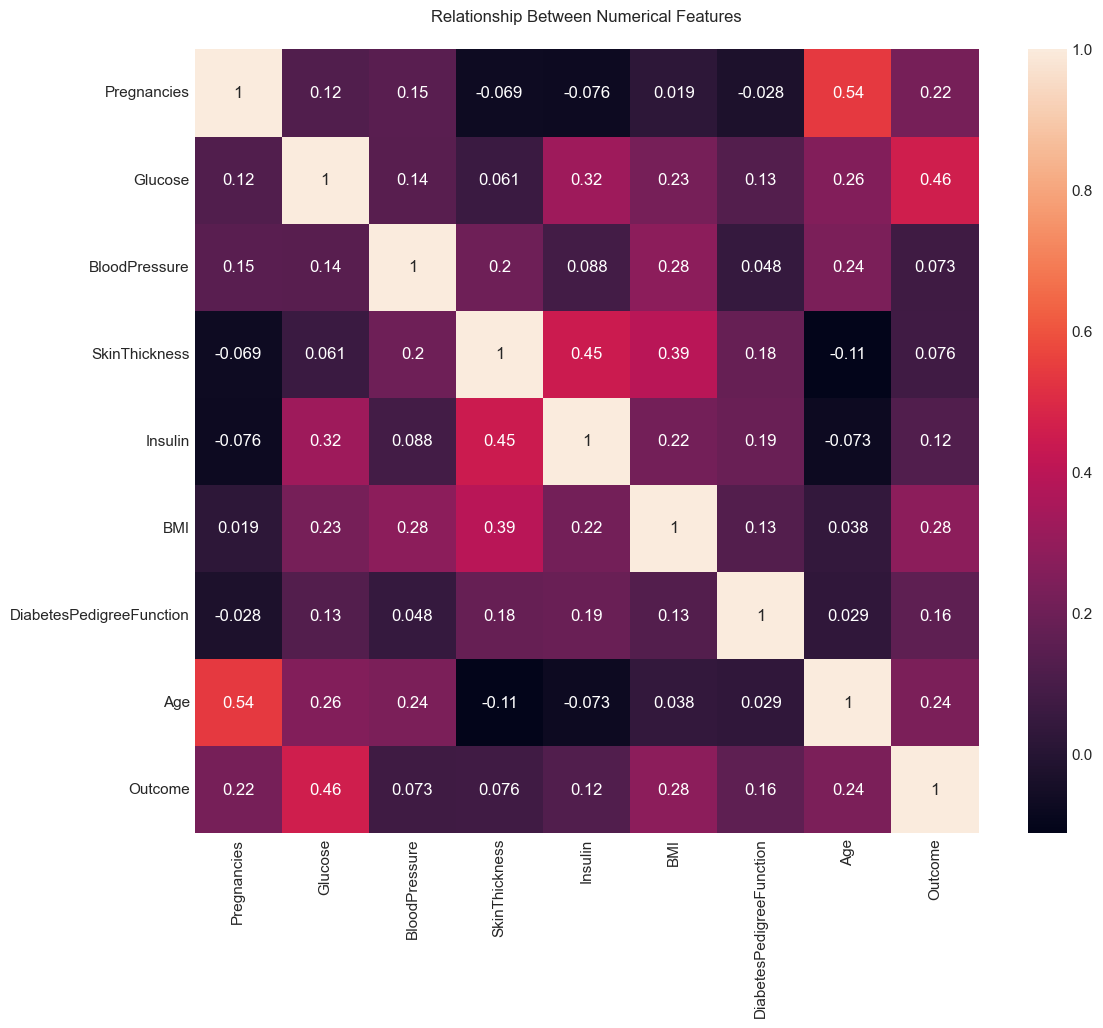

In [347]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title ("Relationship Between Numerical Features", pad = 20)
plt.show()

In [348]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In the description of each columns given above, abnormalities in the dataset is seen. Like BMI being 0, BloodPressure 0, Skinthickness 0, and also Glucose level being 0. Which cannot happen in practical environment. These features of a person cannot be 0 in any condition except death. For the effectiveness of our data and the model that we will train, these data must be eliminated.

4. Data Preparation / Cleaning

In [349]:
df.isnull().sum() # There is no missing values in our dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [350]:
df.isna().sum() # There is no NAN values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [351]:
df.duplicated().sum() # There are duplicates seen

np.int64(1990)

It is definitely not common for different patients to have the same values of that many factors. It is very likely that mistakes were made while inputing the data. Next we shall eliminate all duplicate values.

In [352]:
df = df.drop_duplicates(keep='first')

In [353]:
df.duplicated().sum()

np.int64(0)

Abnormalities in the data check

In [354]:
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [355]:
df[df['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0
766,1,126,60,0,0,30.1,0.349,47,1
2331,4,183,66,0,215,80.6,0.654,40,0


In [356]:
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [357]:
df[df['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


After Duplicates have been removed, still there are abnormalities in the datsets seen, as BMI, SkinThicknesss, BloodPressure and Glucose being 0. Either these are missing values while data input, else this is impossible case. To make our analysis accurate and our model prediction accurate we need to exclude these rows. Filling these datas might be an options as well. But we will exclude these rows this time.

In [358]:
PDF = df ## Copy of our dataset

In [359]:
PDF.shape

(778, 9)

In [360]:
PDF = PDF[PDF['BMI'] != 0]

In [361]:
PDF = PDF[PDF['SkinThickness'] != 0]

In [362]:
PDF = PDF[PDF['BloodPressure'] != 0]

In [363]:
PDF = PDF[PDF['Glucose'] != 0]

In [364]:
PDF.shape ## our final data has 539 records after cleaning all the duplicates, abnormalities in the dataset.

(539, 9)

In [365]:
PDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,3.493506,121.315399,71.434137,29.307978,115.027829,32.975696,0.502707,31.788497,0.335807
std,3.304477,30.951346,12.423028,10.587999,122.634727,6.972614,0.343304,10.868074,0.472711
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.950000,0.259000,23.000000,0.000000
50%,2.000000,116.000000,72.000000,29.000000,92.000000,32.900000,0.417000,28.000000,0.000000
75%,5.000000,142.000000,80.000000,36.000000,166.500000,37.050000,0.659000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [366]:
PDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 2335
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               539 non-null    int64  
 1   Glucose                   539 non-null    int64  
 2   BloodPressure             539 non-null    int64  
 3   SkinThickness             539 non-null    int64  
 4   Insulin                   539 non-null    int64  
 5   BMI                       539 non-null    float64
 6   DiabetesPedigreeFunction  539 non-null    float64
 7   Age                       539 non-null    int64  
 8   Outcome                   539 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.1 KB


We have 9 numerical features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

We have 0 categorical features: []


<Figure size 2000x2000 with 0 Axes>

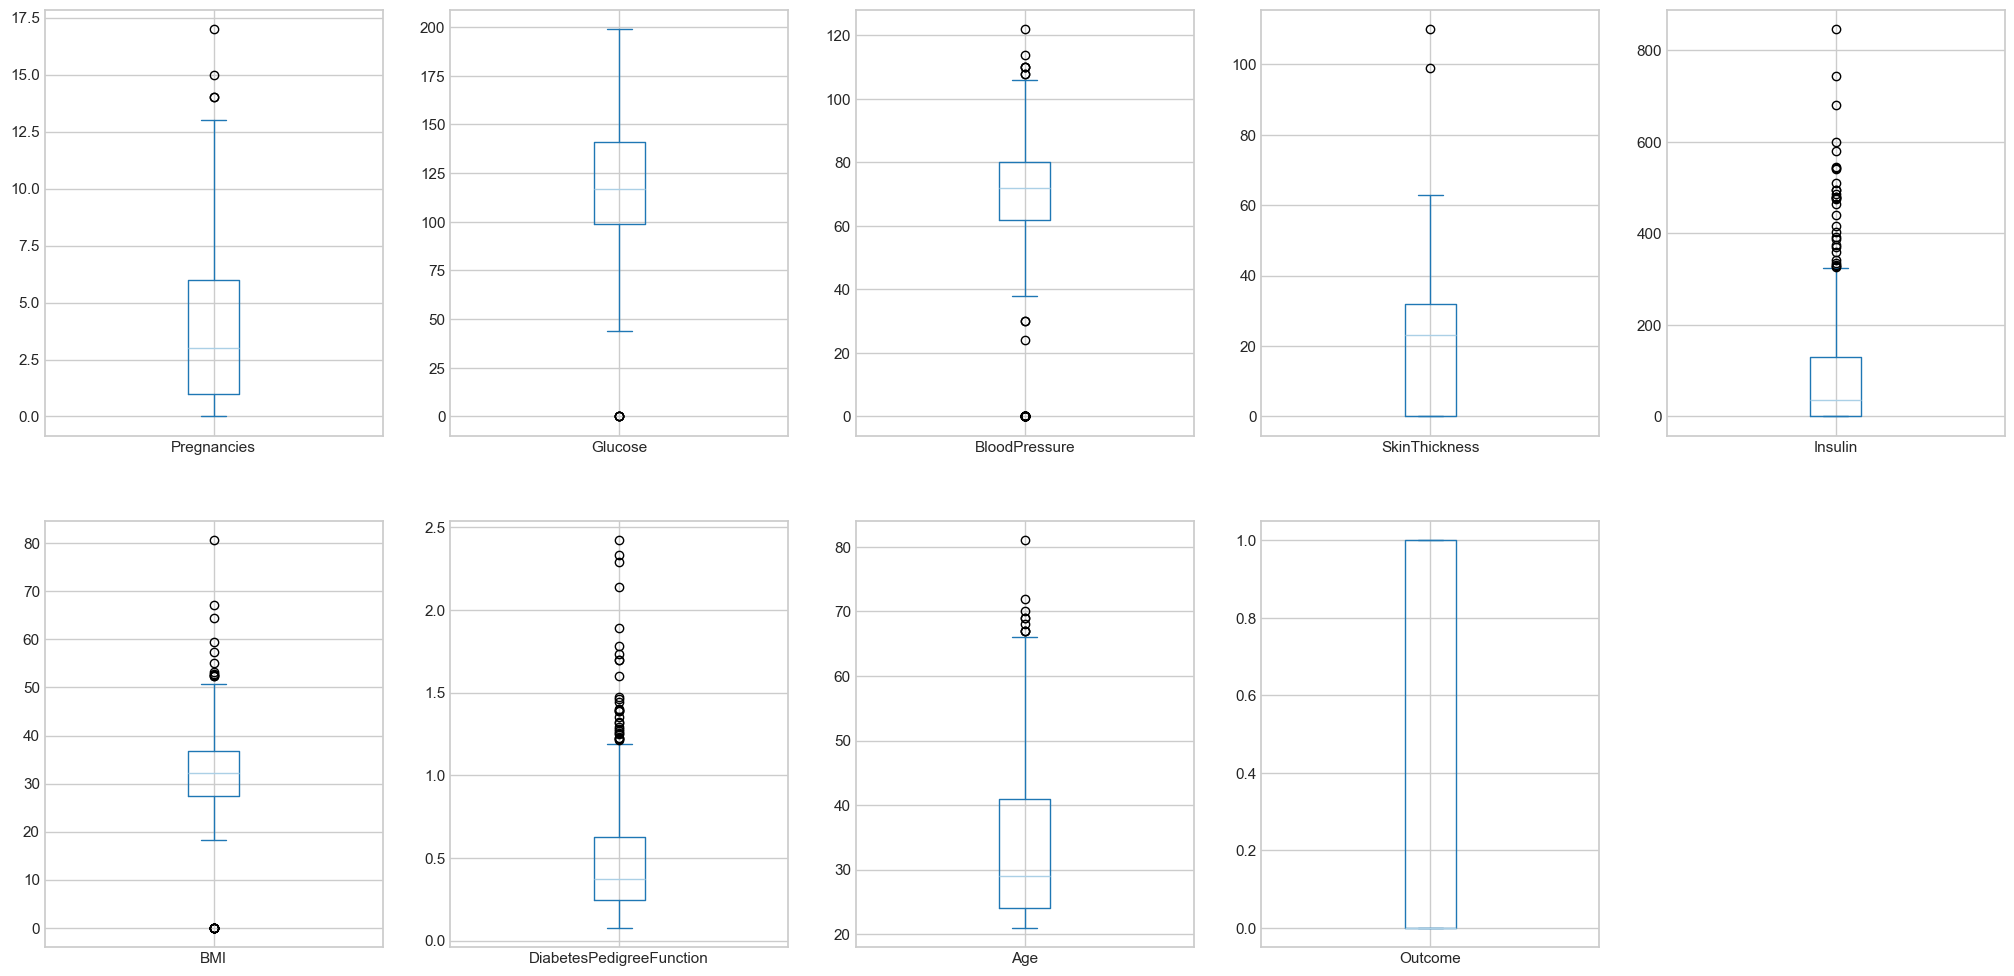

In [367]:
numeric_features = [feature for feature in PDF.columns if PDF[feature].dtype != 'O']
categorical_features = [feature for feature in PDF.columns if PDF[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features)) # all the fields we have are numeric and no categorical data is seen
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

plt.figure(figsize = (20,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
df[numeric_features].plot(kind = 'box', subplots = True, layout = (4,5), figsize = (20,20))

plt.show()

Here multiple features are seen to have outliers present in the data. However lets not remove these outliers now, but if these impact the accuracy of our model, then we will clear them out. Why not clearing now? We have limited rows of data now after duplicates removal as well as abnormalities removal. 

5. EDA (Exploratory Data Analysis) - Data Visualizations

In [368]:
PDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,3.493506,121.315399,71.434137,29.307978,115.027829,32.975696,0.502707,31.788497,0.335807
std,3.304477,30.951346,12.423028,10.587999,122.634727,6.972614,0.343304,10.868074,0.472711
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.950000,0.259000,23.000000,0.000000
50%,2.000000,116.000000,72.000000,29.000000,92.000000,32.900000,0.417000,28.000000,0.000000
75%,5.000000,142.000000,80.000000,36.000000,166.500000,37.050000,0.659000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [369]:
PDF[PDF['Outcome'] == 0].describe() ## For Non Diabetic Patients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.0
mean,2.907821,110.340782,69.740223,27.318436,96.963687,31.539385,0.446749,29.287709,0.0
std,2.784490,24.532630,12.039482,10.060559,105.101505,6.649225,0.297948,9.924839,0.0
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.0
25%,1.000000,94.000000,62.000000,19.000000,0.000000,26.225000,0.243250,22.000000,0.0
50%,2.000000,106.000000,70.000000,27.000000,75.500000,30.900000,0.369000,25.000000,0.0
75%,4.000000,124.000000,78.000000,33.000000,135.000000,35.875000,0.585250,33.000000,0.0
max,13.000000,197.000000,110.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [370]:
PDF[PDF['Outcome'] == 1].describe() ## For Diabetic Patients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.0
mean,4.651934,143.022099,74.784530,33.243094,150.756906,35.816575,0.613387,36.734807,1.0
std,3.902330,30.924093,12.522113,10.530196,145.291150,6.738385,0.397055,10.983136,0.0
min,0.000000,78.000000,30.000000,7.000000,0.000000,20.100000,0.127000,21.000000,1.0
25%,1.000000,119.000000,68.000000,27.000000,0.000000,31.600000,0.326000,28.000000,1.0
50%,4.000000,143.000000,74.000000,33.000000,135.000000,34.600000,0.542000,35.000000,1.0
75%,8.000000,170.000000,84.000000,39.000000,207.000000,38.500000,0.787000,45.000000,1.0
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [371]:
PDF['Outcome'].value_counts()

Outcome
0    358
1    181
Name: count, dtype: int64

Data is not Balanced evenly between the two outcome values 0 and 1. More data is of those records where patients are non diebetic. This will result in uneven fitting of the model, and also drop in the model's accuracy. The model will train to predict non diebetic case more accurately than dibetic cases.

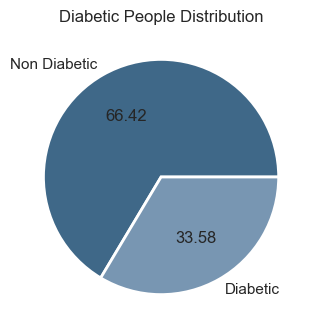

In [372]:
plt.figure(figsize=(3,3))
plt.style.use("_mpl-gallery")
plt.pie(PDF['Outcome'].value_counts(), labels = ['Non Diabetic','Diabetic'], autopct = "%0.2f", 
        wedgeprops = {'linewidth': 2, 'edgecolor' : 'white'}, colors = ['#3f6888','#7896b2'])
plt.title("Diabetic People Distribution")
plt.show()

More people do not have diabetes in the given data set. 1/3rd out of total people are seen to have diabetes. Data is not evenly distributed between Diabetic and Non Diabetic individuals.

In [373]:
numeric_features = [feature for feature in PDF.columns if PDF[feature].dtype != 'O']
categorical_features = [feature for feature in PDF.columns if PDF[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

We have 0 categorical features: []


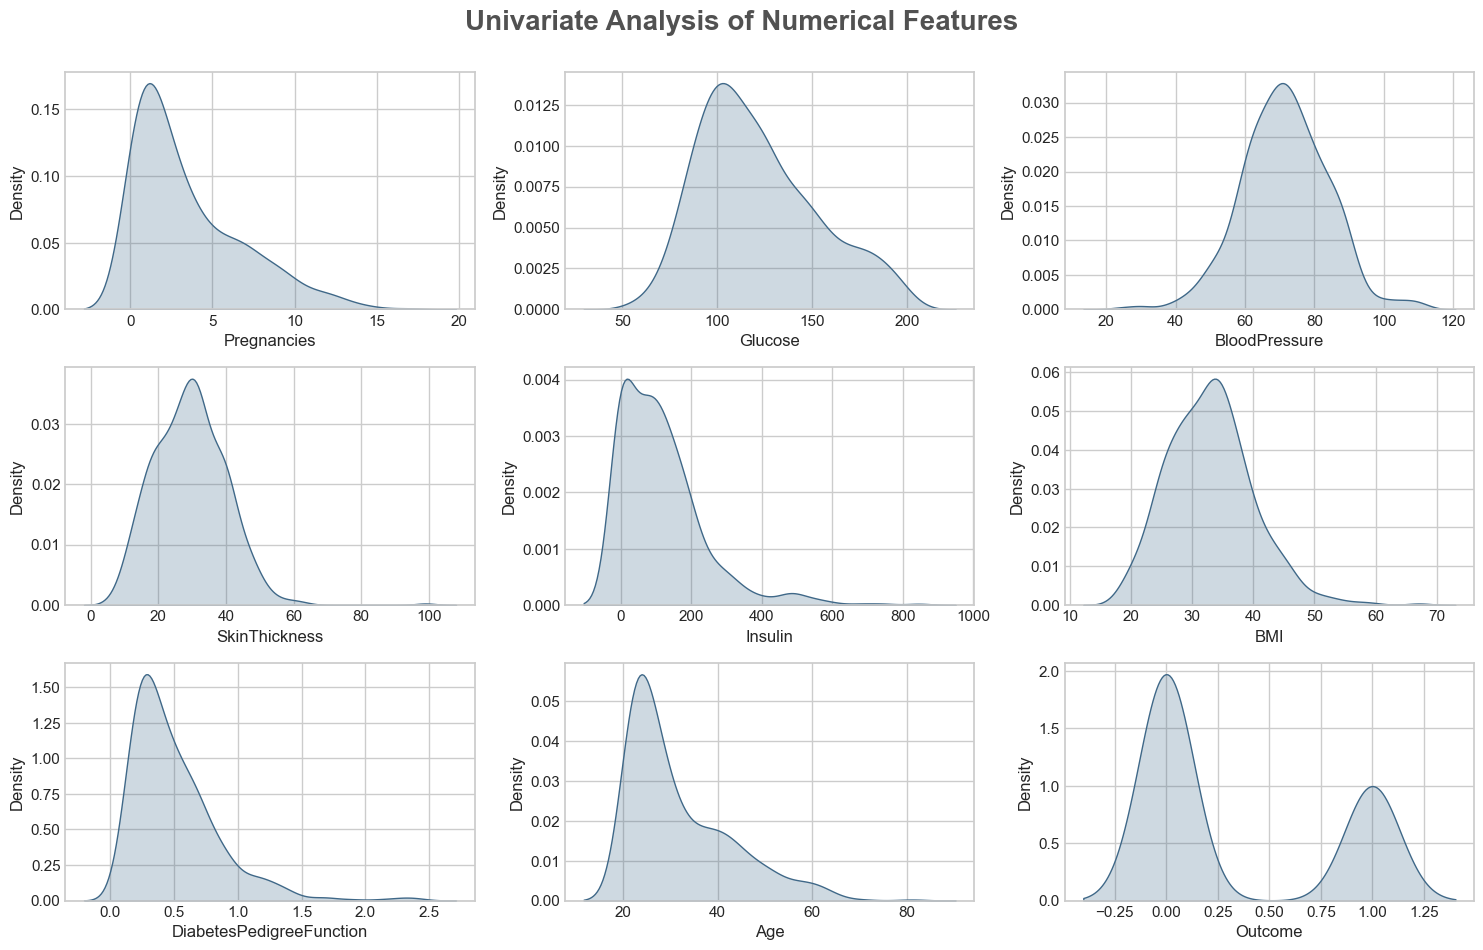

In [374]:
## Visualization Diagrams

plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(0,len(numeric_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x = PDF[numeric_features[i]], shade = True, color = "#3f6888")
  plt.xlabel(numeric_features[i])
  plt.tight_layout()

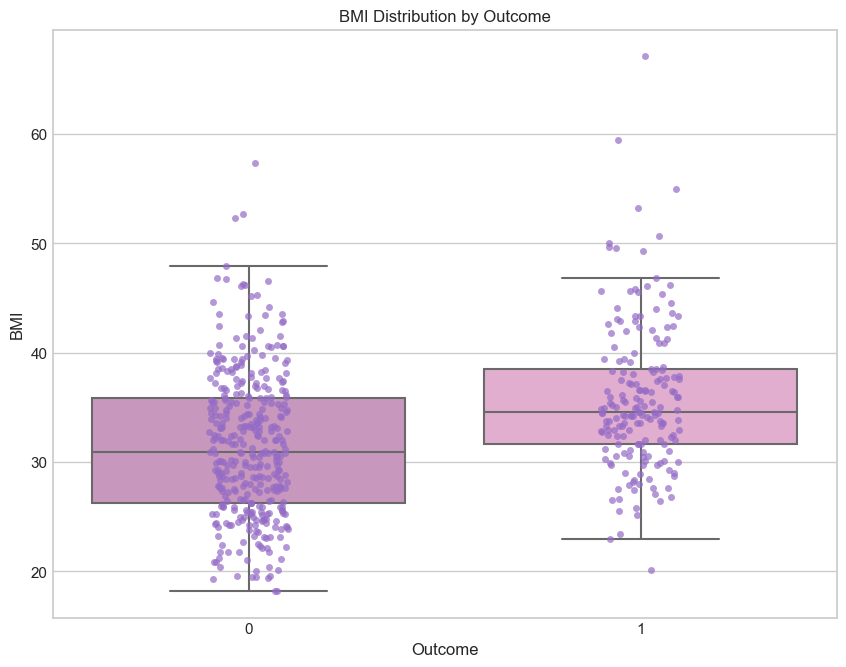

In [375]:
plt.figure(figsize=(8, 6))
custom_palette = ["#d08fc2","#eba5d3"]
sns.boxplot(x='Outcome', y='BMI', data=PDF, palette=custom_palette, fliersize=0, linewidth=1.5)
sns.stripplot(x='Outcome', y='BMI', data=PDF, jitter=True, alpha=0.7, color="#946bc6" ,dodge=True)
plt.title('BMI Distribution by Outcome')
plt.show()

Insights :
1. Individuals with diabetes (outcome = 1) tend to have higher BMI on average.
2. This supports the known clinical insight that higher BMI is a risk factor for diabetes.
3. The clear shift in medians suggests BMI could be a strong predictor feature.

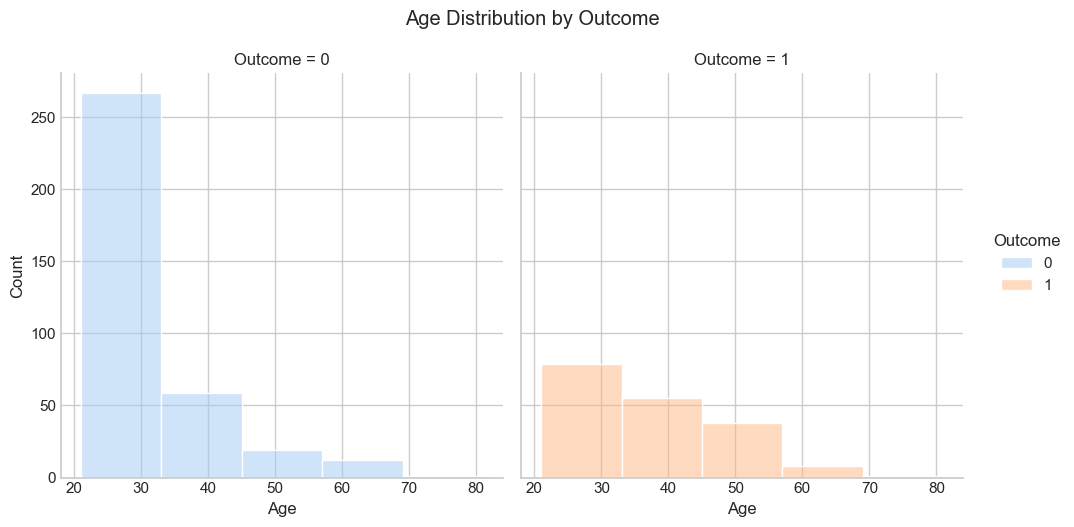

In [376]:

# Create the faceted histogram
g = sns.displot(data=PDF,x="Age",hue="Outcome",col="Outcome",kind="hist",bins=5,palette="pastel",facet_kws={'sharey': True, 'sharex': True})
g.set_axis_labels("Age", "Count")
plt.suptitle("Age Distribution by Outcome", y=1.05)
plt.show()

Insights:
1. Older individuals are more likely to have Diabetes.
2. Younger individuals (under 30) are predominantly non-diabetic.
3. Age appears to be a strong differentiator feature between the two outcome classes.

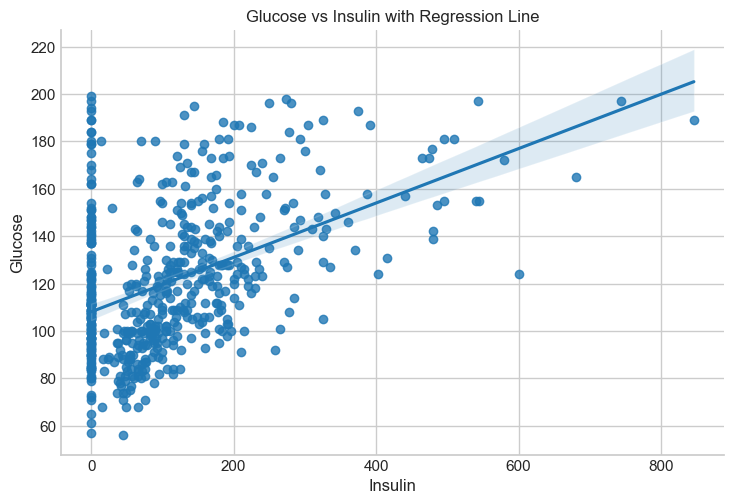

In [377]:
sns.lmplot(data=PDF, x='Insulin', y='Glucose', height=5, aspect=1.5)
plt.title('Glucose vs Insulin with Regression Line')
plt.show()

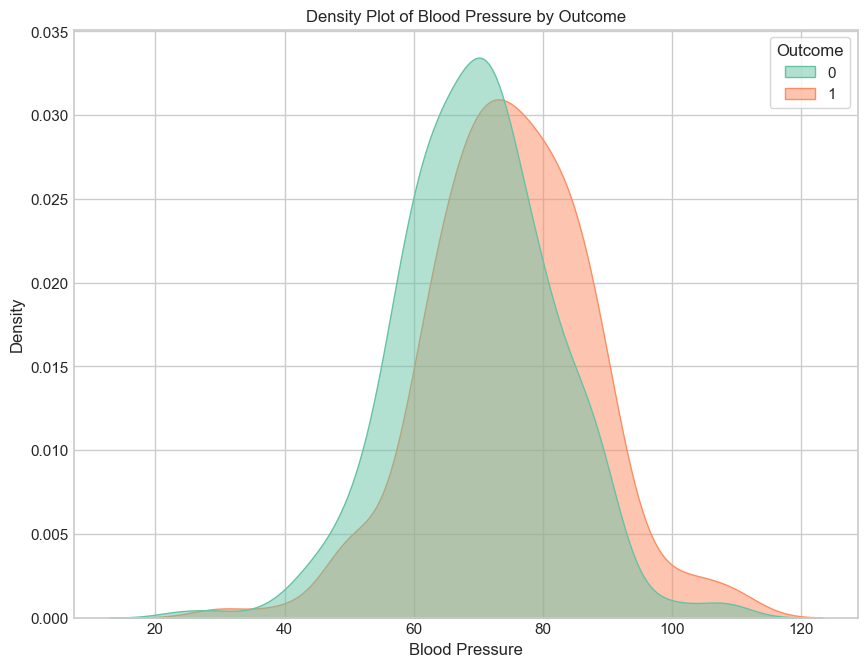

In [379]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=PDF,
    x='BloodPressure',
    hue='Outcome',           # Color/fill by Outcome
    fill=True,               # Fill under the curve (like fill in ggplot)
    alpha=0.5,               # Transparency
    common_norm=False,       # Keeps each group normalized separately
    palette='Set2'           # Optional color palette
)

plt.title('Density Plot of Blood Pressure by Outcome')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Patients with Diabetes tend to have slightly higher blood pressure

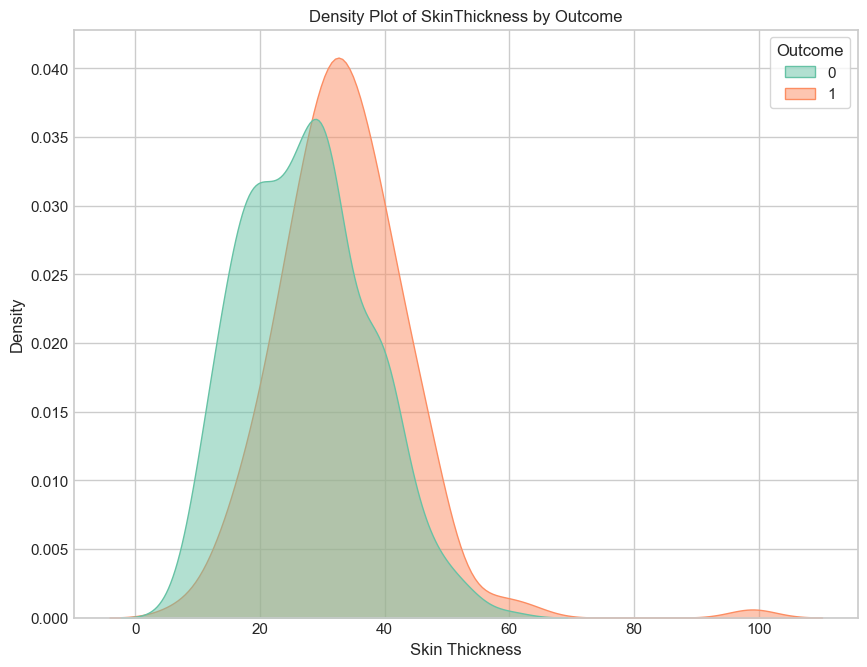

In [380]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=PDF,
    x='SkinThickness',
    hue='Outcome',           # Color/fill by Outcome
    fill=True,               # Fill under the curve (like fill in ggplot)
    alpha=0.5,               # Transparency
    common_norm=False,       # Keeps each group normalized separately
    palette='Set2'           # Optional color palette
)

plt.title('Density Plot of SkinThickness by Outcome')
plt.xlabel('Skin Thickness')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Patients with Diabetes tend to have thicker skin

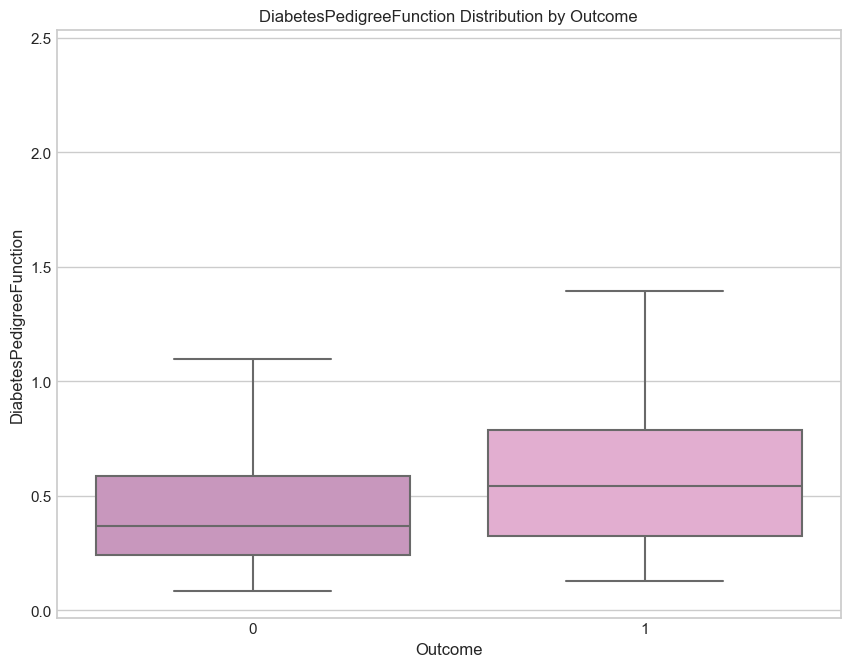

In [432]:

plt.figure(figsize=(8, 6))
custom_palette = ["#d08fc2","#eba5d3"]
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=PDF, palette=custom_palette, fliersize=0, linewidth=1.5)
plt.title('DiabetesPedigreeFunction Distribution by Outcome')
plt.show()

6. Model Building

In [382]:
##Splitting the data into dependent and independent dataset
x = PDF.drop(columns = 'Outcome') ## Independent features, all columns except Outcome column
y = PDF['Outcome'] ## Dependent Feature

In [383]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...,...
2329,0,116,64,39,225,40.2,0.720,50
2330,2,142,94,59,177,38.3,0.620,63
2333,0,163,40,23,64,40.7,0.322,33
2334,6,139,84,37,0,50.7,0.320,50


In [384]:
y

0       1
1       0
3       0
4       1
6       1
       ..
2329    0
2330    1
2333    0
2334    1
2335    0
Name: Outcome, Length: 539, dtype: int64

After dividing the dataset into dependent and independent features, now we divide the data into train data and test data. Train data are those data based on which we will train our model to generate the result, and Test data are those which are used to test the model's accuracy that we have built. 

In [385]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

Here, text_size 0.2 means that 80% of our total data will be used to train the model and remaining 20% of the data will be used for testing the model.

First choice was classification (Logistic Regression) model, as the outome data can be classified into 0 (non diabetic) and 1 (diabetic) but when tried only around 74% accuracy from the model is seen. Thus trying multiple models to see the best fit model for the data to train into.

In [386]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [387]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [388]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7314814814814815
[[54 15]
 [14 25]]
0.625


In [389]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.6851851851851852
[[51 18]
 [16 23]]
0.5609756097560976


In [390]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.6388888888888888
[[69  0]
 [39  0]]
0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [393]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [395]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [396]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [397]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

(0.7870370370370371, 0.7666666666666667)

In [398]:
clfs.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('BgC', BaggingClassifier(n_estimators=50, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2))])

In [399]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.6388888888888888
Precision -  0.0
For  KN
Accuracy -  0.75
Precision -  0.7142857142857143
For  NB
Accuracy -  0.6851851851851852
Precision -  0.5609756097560976
For  DT
Accuracy -  0.7037037037037037
Precision -  0.6
For  LR
Accuracy -  0.7870370370370371
Precision -  0.7666666666666667
For  RF
Accuracy -  0.7592592592592593
Precision -  0.7241379310344828
For  AdaBoost
Accuracy -  0.8148148148148148
Precision -  0.8275862068965517
For  BgC
Accuracy -  0.7407407407407407
Precision -  0.7037037037037037
For  ETC
Accuracy -  0.7685185185185185
Precision -  0.75
For  GBDT
Accuracy -  0.7777777777777778
Precision -  0.7142857142857143


Instead of Logistic Regression, we can see ADABOOST Algorithm is giving us more precision and accuracy i.e. more than 80%.

In [400]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [401]:
performance_df

,Algorithm,Accuracy,Precision
6,AdaBoost,0.814815,0.827586
4,LR,0.787037,0.766667
8,ETC,0.768519,0.750000
5,RF,0.759259,0.724138
9,GBDT,0.777778,0.714286
1,KN,0.750000,0.714286
7,BgC,0.740741,0.703704
3,DT,0.703704,0.600000
2,NB,0.685185,0.560976
0,SVC,0.638889,0.000000


In [402]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [403]:
performance_df1

,Algorithm,variable,value
0,AdaBoost,Accuracy,0.814815
1,LR,Accuracy,0.787037
2,ETC,Accuracy,0.768519
3,RF,Accuracy,0.759259
4,GBDT,Accuracy,0.777778
5,KN,Accuracy,0.750000
6,BgC,Accuracy,0.740741
7,DT,Accuracy,0.703704
8,NB,Accuracy,0.685185
9,SVC,Accuracy,0.638889


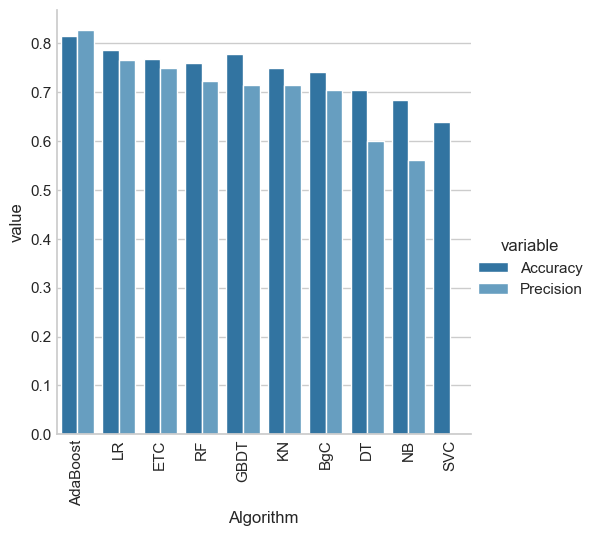

In [404]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.xticks(rotation='vertical')
plt.show()

Removing the outliers from the data didnot have any impact on the accuracy of the model, so we will move ahead by not removing them for now. Instead applying Hyperparameter Tuning to improve the model efficiency.

In [421]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [422]:
parameters = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 1.0),
    'algorithm': ['SAMME', 'SAMME.R'],
    'estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ]
}

In [423]:
random_clf = RandomizedSearchCV(AdaBoostClassifier(), param_distributions=parameters)

In [424]:
random_clf.fit(x_train,y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'estimator': [DecisionTreeClassifier(max_depth=1),
                                                      DecisionTreeClassifier(max_depth=2),
                                                      DecisionTreeClassifier(max_depth=3)],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x128cc7620>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1295b7150>})

In [425]:
random_clf.best_params_

{'algorithm': 'SAMME',
 'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': np.float64(0.036949285850865314),
 'n_estimators': 88}

In [426]:
abc = AdaBoostClassifier(n_estimators=88, random_state=2,algorithm='SAMME', estimator=DecisionTreeClassifier(max_depth=2),learning_rate=np.float64(0.036949285850865314))

In [427]:
#Train the Model
abc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=np.float64(0.036949285850865314),
                   n_estimators=88, random_state=2)

In [428]:
y_pred = abc.predict(x_test)

In [430]:
from sklearn.metrics import accuracy_score, precision_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
print(f"Accuracy : {acc:4f}")
print(f"Precision: {prec:4f}")

Accuracy : 0.777778
Precision: 0.777778


Before Hypertuning the accuracy and precision was better than what result we got after. May be random sampling might have missed good parameter combos, and also as the dataset of ours is imbalanced this might be the problem due to overfitting on Training Data.

Anyways we are going with the model that we created before tuning where we got accuracy and precision of more than 80%.

In [431]:
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
print(f"Accuracy : {acc:4f}")
print(f"Precision: {prec:4f}")

Accuracy : 0.814815
Precision: 0.827586


After creating the model, now saving the fitted model in a pickle file.

In [406]:
#Save the fitted model
import pickle
pickle.dump(abc, open('model.pkl', 'wb'))